In [1]:
# Importing the necessary packages

import pandas                          as      pd
import numpy                           as      np
import matplotlib.pyplot               as      plt
import seaborn as sns
import statsmodels.tools.eval_measures as      em
from   sklearn.metrics                 import  mean_squared_error
from   statsmodels.tsa.api             import ExponentialSmoothing, SimpleExpSmoothing, Holt
from   IPython.display                 import display
from   pylab                           import rcParams

# Define the problem and perform Exploratory Data Analysis 

In [152]:
df = pd.read_csv('Rose.csv',parse_dates=True,index_col='YearMonth')
df.head()

,Rose
YearMonth,
1980-01-01,112.0
1980-02-01,118.0
1980-03-01,129.0
1980-04-01,99.0
1980-05-01,116.0


In [153]:
df.tail()

,Rose
YearMonth,
1995-03-01,45.0
1995-04-01,52.0
1995-05-01,28.0
1995-06-01,40.0
1995-07-01,62.0


In [154]:
rcParams['figure.figsize'] = 15,8

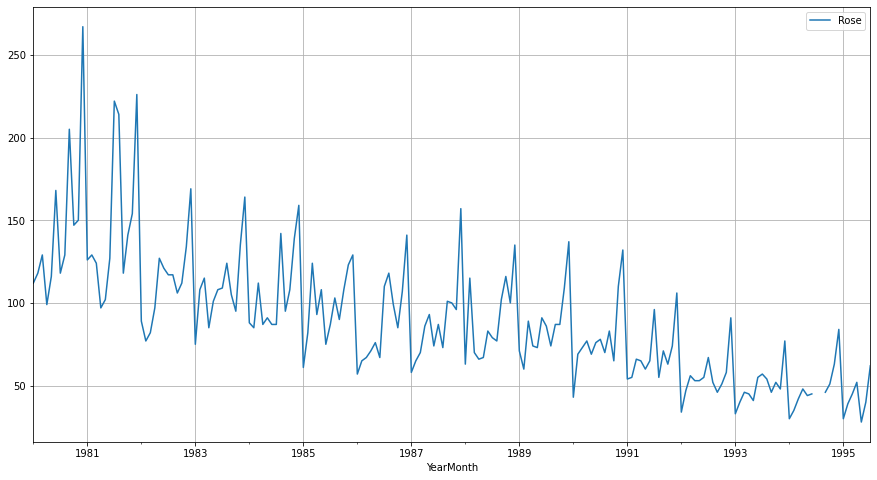

In [155]:
df.plot(grid=True);

In [156]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rose,185.0,90.394595,39.175344,28.0,63.0,86.0,112.0,267.0


In [157]:
df.shape

(187, 1)

In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-01 to 1995-07-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rose    185 non-null    float64
dtypes: float64(1)
memory usage: 2.9 KB


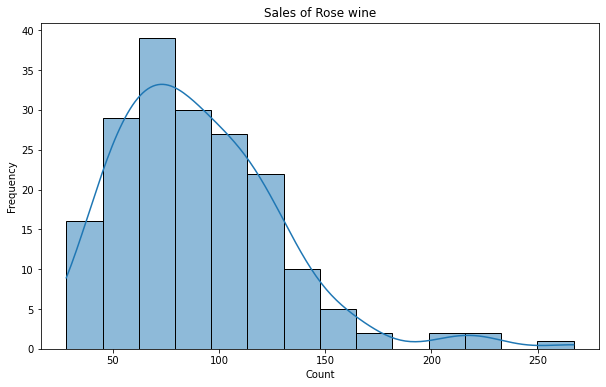

In [159]:
# Data visualization, EDA
plt.figure(figsize=(10, 6))
sns.histplot(df['Rose'], kde=True)
plt.title('Sales of Rose wine')
plt.xlabel('Count')
plt.ylabel('Frequency')
plt.show()

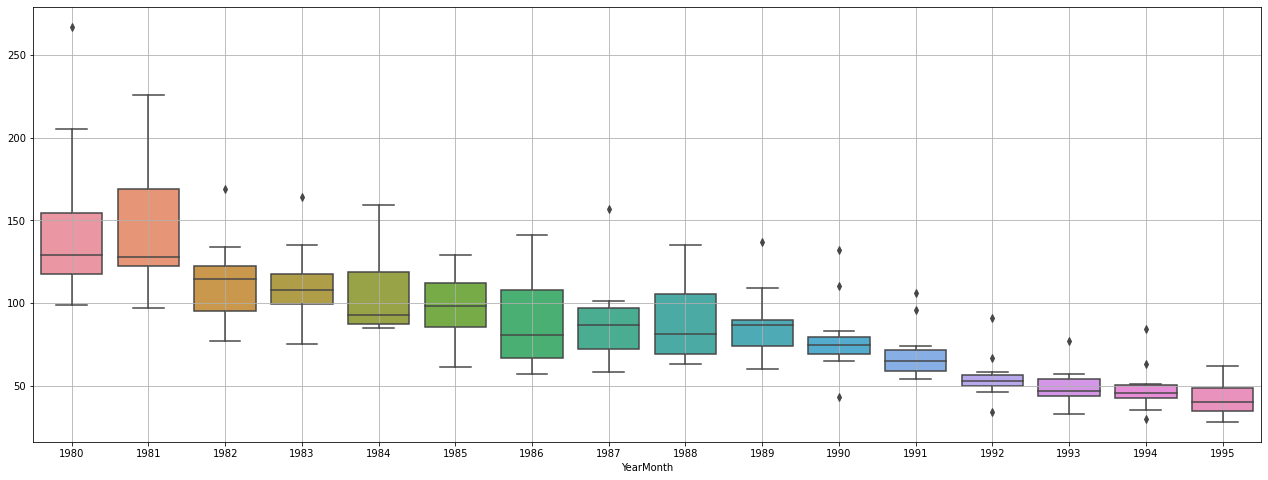

In [160]:
#Yearly Boxplot
_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = df.index.year,y = df.values[:,0],ax=ax)
plt.grid();

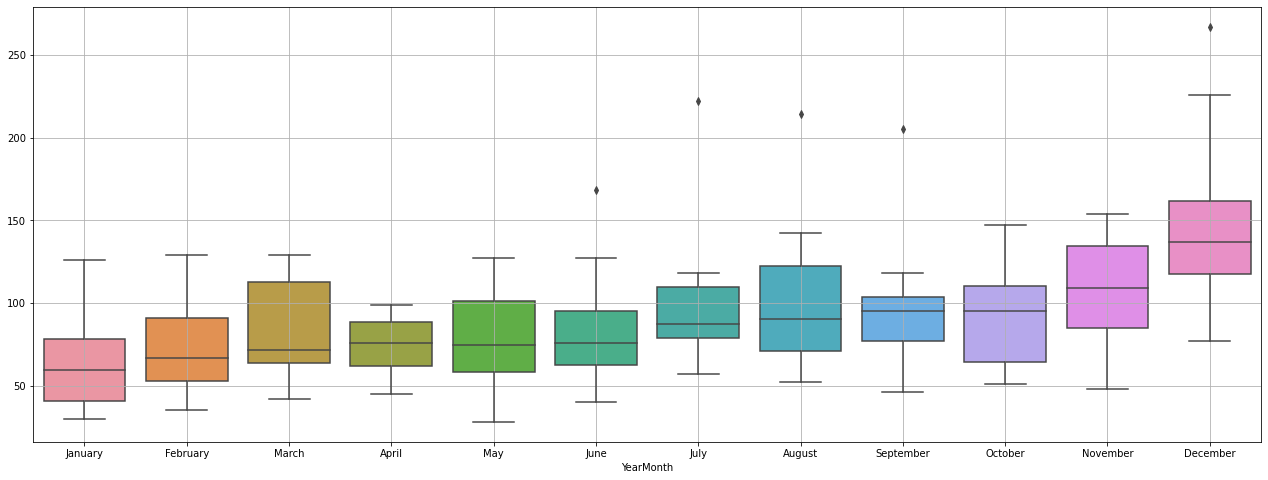

In [161]:
#Monthly Boxplot
_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = df.index.month_name(),y = df.values[:,0],ax=ax)
plt.grid();

In [162]:
#Plot a graph of monthly sales across years.
monthly_sales_across_years = pd.pivot_table(df, values = 'Rose', columns = df.index.month_name(), index = df.index.year)
monthly_sales_across_years

YearMonth,April,August,December,February,January,July,June,March,May,November,October,September
YearMonth,,,,,,,,,,,,
1980,99.0,129.0,267.0,118.0,112.0,118.0,168.0,129.0,116.0,150.0,147.0,205.0
1981,97.0,214.0,226.0,129.0,126.0,222.0,127.0,124.0,102.0,154.0,141.0,118.0
1982,97.0,117.0,169.0,77.0,89.0,117.0,121.0,82.0,127.0,134.0,112.0,106.0
1983,85.0,124.0,164.0,108.0,75.0,109.0,108.0,115.0,101.0,135.0,95.0,105.0
1984,87.0,142.0,159.0,85.0,88.0,87.0,87.0,112.0,91.0,139.0,108.0,95.0
1985,93.0,103.0,129.0,82.0,61.0,87.0,75.0,124.0,108.0,123.0,108.0,90.0
1986,71.0,118.0,141.0,65.0,57.0,110.0,67.0,67.0,76.0,107.0,85.0,99.0
1987,86.0,73.0,157.0,65.0,58.0,87.0,74.0,70.0,93.0,96.0,100.0,101.0
1988,66.0,77.0,135.0,115.0,63.0,79.0,83.0,70.0,67.0,100.0,116.0,102.0


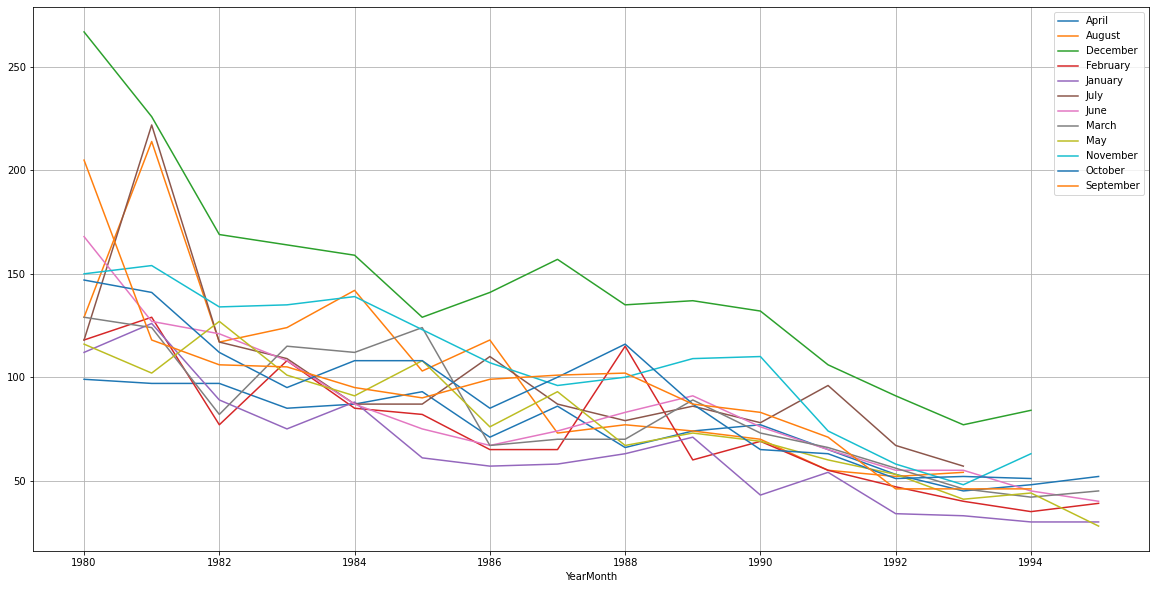

In [163]:
monthly_sales_across_years.plot(figsize=(20,10))
plt.grid()
plt.legend(loc='best');

DatetimeIndex(['1980-01-31', '1980-02-29', '1980-03-31', '1980-04-30',
               '1980-05-31', '1980-06-30', '1980-07-31', '1980-08-31',
               '1980-09-30', '1980-10-31',
               ...
               '1995-11-30', '1995-12-31', '1996-01-31', '1996-02-29',
               '1996-03-31', '1996-04-30', '1996-05-31', '1996-06-30',
               '1996-07-31', '1996-08-31'],
              dtype='datetime64[ns]', length=200, freq='M')
<MonthEnd>


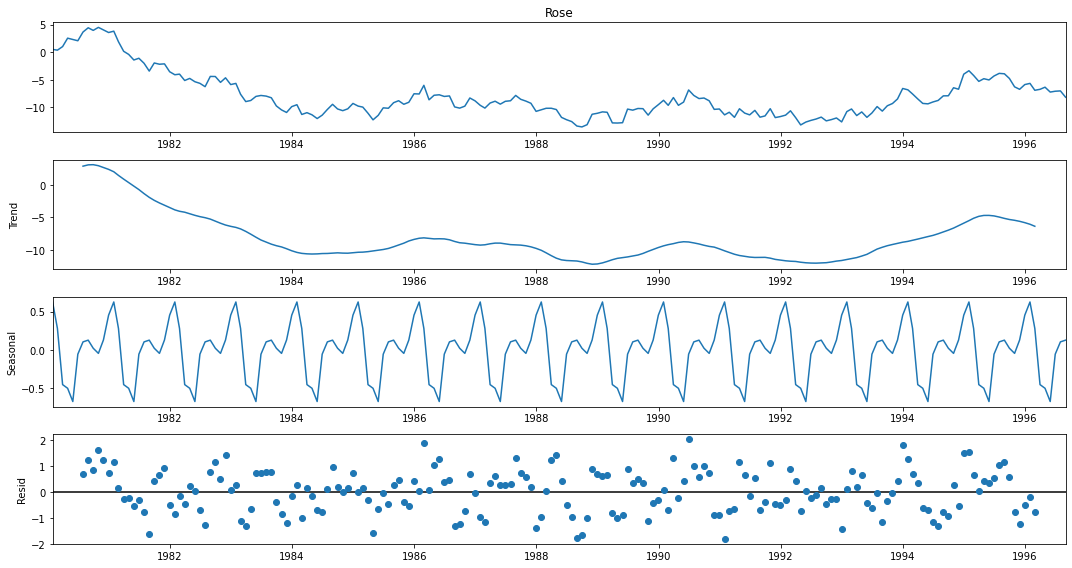

In [164]:
#Decomposition of time series
from statsmodels.tsa.seasonal import seasonal_decompose
np.random.seed(42)
dates = pd.date_range(start='1980-01-01', periods=200, freq='M')  # Monthly data for example
data = np.random.randn(200).cumsum()
df = pd.DataFrame(data, columns=['Rose'], index=dates)

# Ensure the index is a DatetimeIndex with a frequency
df.index = pd.to_datetime(df.index)
df = df.asfreq('M')  # Set frequency to monthly

# Check the index and frequency
print(df.index)
print(df.index.freq)

# Decompose the time series
decomposition = seasonal_decompose(df['Rose'], model='additive')

# Plot the decomposed components
decomposition.plot()
plt.show()


In [15]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.round(2).head(12),'\n')
print('Seasonality','\n',seasonality.round(2).head(12),'\n')
print('Residual','\n',residual.round(2).head(12),'\n')

Trend 
 1980-01-31     NaN
1980-02-29     NaN
1980-03-31     NaN
1980-04-30     NaN
1980-05-31     NaN
1980-06-30     NaN
1980-07-31    2.87
1980-08-31    3.07
1980-09-30    3.10
1980-10-31    2.94
1980-11-30    2.66
1980-12-31    2.38
Freq: M, Name: trend, dtype: float64 

Seasonality 
 1980-01-31    0.62
1980-02-29    0.28
1980-03-31   -0.45
1980-04-30   -0.50
1980-05-31   -0.67
1980-06-30   -0.06
1980-07-31    0.10
1980-08-31    0.13
1980-09-30    0.02
1980-10-31   -0.05
1980-11-30    0.13
1980-12-31    0.45
Freq: M, Name: seasonal, dtype: float64 

Residual 
 1980-01-31     NaN
1980-02-29     NaN
1980-03-31     NaN
1980-04-30     NaN
1980-05-31     NaN
1980-06-30     NaN
1980-07-31    0.67
1980-08-31    1.21
1980-09-30    0.82
1980-10-31    1.59
1980-11-30    1.23
1980-12-31    0.72
Freq: M, Name: resid, dtype: float64 



# Data Pre-processing

In [147]:
missing_values = df.isna().sum()
print("Missing values per column (using isna):")
print(missing_values)


Missing values per column (using isna):
Rose    0
dtype: int64


In [149]:
# Check for NaNs
print(df.isna().sum())

# Check for infinities
print(np.isinf(df).sum())

Rose    0
dtype: int64
Rose    0
dtype: int64


In [18]:
df['Rose'] = df['Rose'].interpolate(method='polynomial', order=2)

print(df)

                Rose
1980-01-31  0.496714
1980-02-29  0.358450
1980-03-31  1.006138
1980-04-30  2.529168
1980-05-31  2.295015
...              ...
1996-04-30 -6.339299
1996-05-31 -7.223157
1996-06-30 -7.069431
1996-07-31 -7.011223
1996-08-31 -8.154193

[200 rows x 1 columns]


In [19]:
#Split the data into train and test and plot the training and test data.
train    =   df[0:int(len(df)*0.7)] 
test     =   df[int(len(df)*0.7):]

In [20]:
print(train.shape)
print(test.shape)

(140, 1)
(60, 1)


In [21]:
print('First few rows of Training Data','\n',train.head(),'\n')
print('Last few rows of Training Data','\n',train.tail(),'\n')
print('First few rows of Test Data','\n',test.head(),'\n')
print('Last few rows of Test Data','\n',test.tail(),'\n')

First few rows of Training Data 
                 Rose
1980-01-31  0.496714
1980-02-29  0.358450
1980-03-31  1.006138
1980-04-30  2.529168
1980-05-31  2.295015 

Last few rows of Training Data 
                  Rose
1991-04-30 -10.241346
1991-05-31 -11.024599
1991-06-30 -11.346661
1991-07-31 -10.533144
1991-08-31 -11.764008 

First few rows of Test Data 
                  Rose
1991-09-30 -11.536548
1991-10-31 -10.229405
1991-11-30 -11.836889
1991-12-31 -11.652255
1992-01-31 -11.392372 

Last few rows of Test Data 
                 Rose
1996-04-30 -6.339299
1996-05-31 -7.223157
1996-06-30 -7.069431
1996-07-31 -7.011223
1996-08-31 -8.154193 



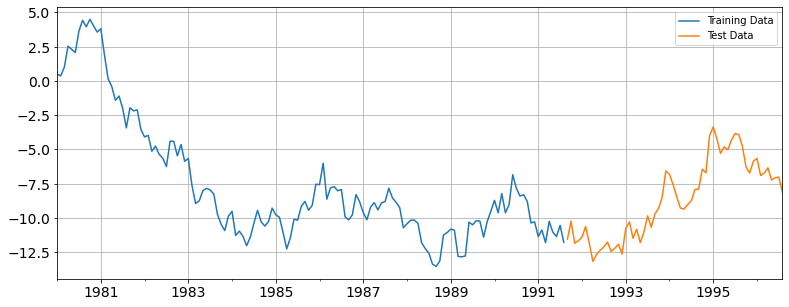

In [22]:
train['Rose'].plot(figsize=(13,5), fontsize=14)
test['Rose'].plot(figsize=(13,5), fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

# Model Building - Original Data

## Model 1 - Linear Regression

In [23]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+43 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140]
Test Time instance 
 [43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102]


In [24]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [25]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data','\n',LinearRegression_train.head(),'\n')
print('Last few rows of Training Data','\n',LinearRegression_train.tail(),'\n')
print('First few rows of Test Data','\n',LinearRegression_test.head(),'\n')
print('Last few rows of Test Data','\n',LinearRegression_test.tail(),'\n')

First few rows of Training Data 
                 Rose  time
1980-01-31  0.496714     1
1980-02-29  0.358450     2
1980-03-31  1.006138     3
1980-04-30  2.529168     4
1980-05-31  2.295015     5 

Last few rows of Training Data 
                  Rose  time
1991-04-30 -10.241346   136
1991-05-31 -11.024599   137
1991-06-30 -11.346661   138
1991-07-31 -10.533144   139
1991-08-31 -11.764008   140 

First few rows of Test Data 
                  Rose  time
1991-09-30 -11.536548    43
1991-10-31 -10.229405    44
1991-11-30 -11.836889    45
1991-12-31 -11.652255    46
1992-01-31 -11.392372    47 

Last few rows of Test Data 
                 Rose  time
1996-04-30 -6.339299    98
1996-05-31 -7.223157    99
1996-06-30 -7.069431   100
1996-07-31 -7.011223   101
1996-08-31 -8.154193   102 



In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
lr = LinearRegression()

In [28]:
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Rose'].values)

LinearRegression()

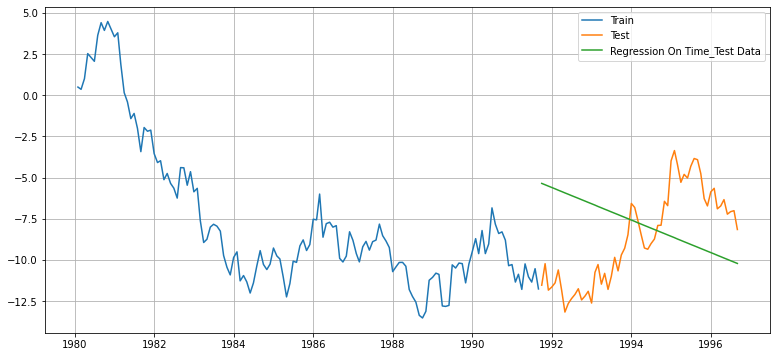

In [29]:
test_predictions_model1         = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

plt.figure(figsize=(13,6))
plt.plot( train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')
plt.legend(loc='best')
plt.grid();

In [30]:
#Defining the accuracy metrics.
from sklearn import metrics

In [31]:
#Model Evaluation
## Test Data - RMSE

rmse_model1_test = metrics.mean_squared_error(test['Rose'],test_predictions_model1)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.2f" %(rmse_model1_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 17.24


In [32]:
resultsDf = pd.DataFrame({'RMSE': [rmse_model1_test]},index=['Linear Regression Model'])
resultsDf

,RMSE
Linear Regression Model,17.24439


## Method 2 - Simple Average 

In [33]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [34]:
SimpleAverage_test['mean_forecast'] = test['Rose'].mean()
SimpleAverage_test.head()

,Rose,mean_forecast
1991-09-30,-11.536548,-8.609387
1991-10-31,-10.229405,-8.609387
1991-11-30,-11.836889,-8.609387
1991-12-31,-11.652255,-8.609387
1992-01-31,-11.392372,-8.609387


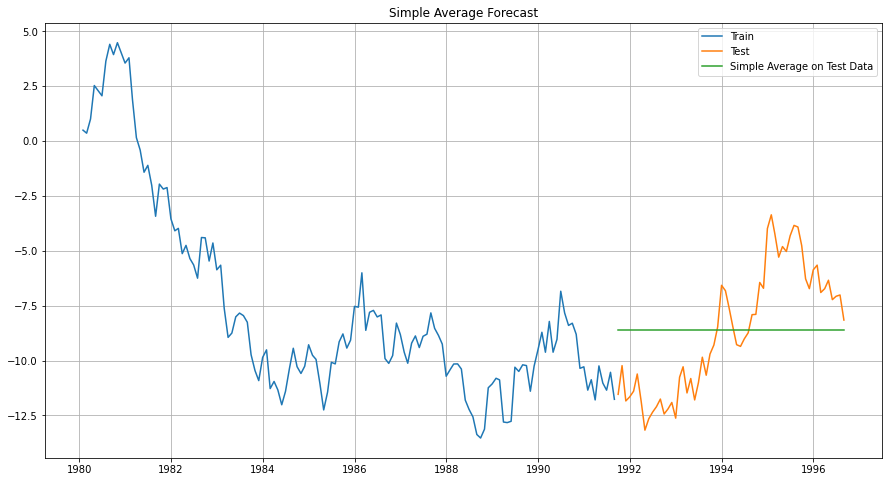

In [35]:
plt.plot(SimpleAverage_train['Rose'], label='Train')
plt.plot(SimpleAverage_test['Rose'], label='Test')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

In [36]:
#Model evaluation
rmse_model2_test = metrics.mean_squared_error(test['Rose'],SimpleAverage_test['mean_forecast'])
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f" %(rmse_model2_test))

For Simple Average forecast on the Test Data,  RMSE is 7.866


In [37]:
resultsDf1 = pd.DataFrame({'RMSE': rmse_model2_test}
                           ,index=['Simple Average Model :'])

pd.concat([resultsDf,resultsDf1])

,RMSE
Linear Regression Model,17.244390
Simple Average Model :,7.866237


## Method 3 - Moving average 

In [38]:
MovingAverage = df.copy()
MovingAverage.head()

,Rose
1980-01-31,0.496714
1980-02-29,0.358450
1980-03-31,1.006138
1980-04-30,2.529168
1980-05-31,2.295015


In [39]:
MovingAverage['Trailing_2'] = MovingAverage['Rose'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Rose'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Rose'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Rose'].rolling(9).mean()

MovingAverage.head()

,Rose,Trailing_2,Trailing_4,Trailing_6,Trailing_9
1980-01-31,0.496714,NaN,NaN,NaN,NaN
1980-02-29,0.358450,0.427582,NaN,NaN,NaN
1980-03-31,1.006138,0.682294,NaN,NaN,NaN
1980-04-30,2.529168,1.767653,1.097618,NaN,NaN
1980-05-31,2.295015,2.412092,1.547193,NaN,NaN


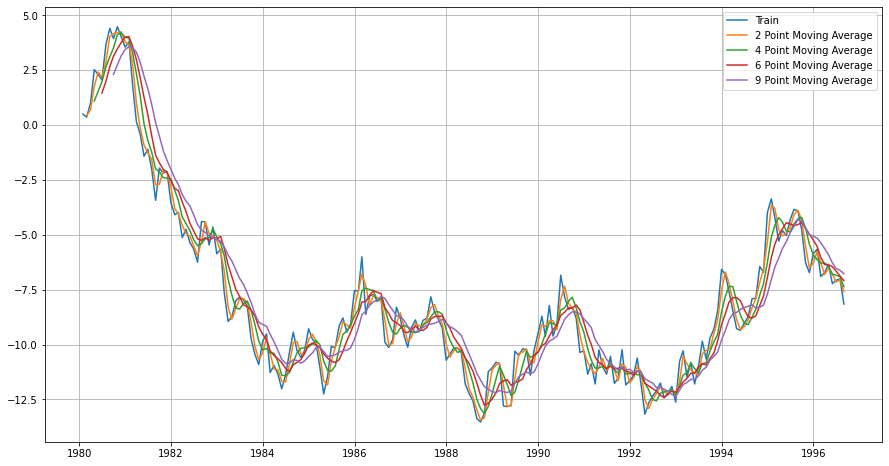

In [40]:
## Plotting on the whole data

plt.plot(MovingAverage['Rose'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

In [41]:
#Creating train and test set 
trailing_MovingAverage_train=MovingAverage[0:int(len(MovingAverage)*0.7)] 
trailing_MovingAverage_test=MovingAverage[int(len(MovingAverage)*0.7):]

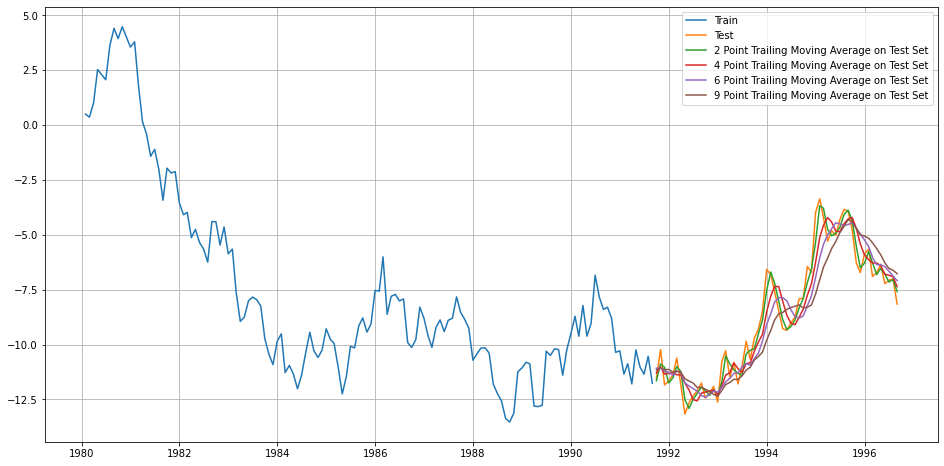

In [42]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train['Rose'], label='Train')
plt.plot(trailing_MovingAverage_test['Rose'], label='Test')


plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')

plt.legend(loc = 'best')
plt.grid();

In [43]:
#Model evaluation
rmse_model4_test_2 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_2'])
print("For 2 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_2))

## Test Data - RMSE --> 4 point Trailing MA

rmse_model4_test_4 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_4'])
print("For 4 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_4))

## Test Data - RMSE --> 6 point Trailing MA

rmse_model4_test_6 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_6'])
print("For 6 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_6))

## Test Data - RMSE --> 9 point Trailing MA

rmse_model4_test_9 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_9'])
print("For 9 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_9))

For 2 point Moving Average Model forecast on the Training Data,  RMSE is 0.201
For 4 point Moving Average Model forecast on the Training Data,  RMSE is 0.644
For 6 point Moving Average Model forecast on the Training Data,  RMSE is 1.037
For 9 point Moving Average Model forecast on the Training Data,  RMSE is 1.577


In [44]:
resultsDf2 = pd.DataFrame({'RMSE': rmse_model4_test_2}
                           ,index=['Moving Average Model :'])

pd.concat([resultsDf,resultsDf1,resultsDf2])

,RMSE
Linear Regression Model,17.244390
Simple Average Model :,7.866237
Moving Average Model :,0.200754


## Method 4 - Exponential Models 

#### Single Exponential Smoothing 

In [45]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [46]:
# create class
model_SES = SimpleExpSmoothing(train,initialization_method='estimated')

In [47]:
# Fitting the Simple Exponential Smoothing model and asking python to choose the optimal parameters
model_SES_autofit = model_SES.fit(optimized=True)

In [48]:
## Let us check the parameters

model_SES_autofit.params

{'smoothing_level': 0.939239883059223,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 0.49096762270133,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [49]:
# Using the fitted model on the training set to forecast on the test set
SES_predict = model_SES_autofit.forecast(steps=len(test))
SES_predict

1991-09-30   -11.692142
1991-10-31   -11.692142
1991-11-30   -11.692142
1991-12-31   -11.692142
1992-01-31   -11.692142
1992-02-29   -11.692142
1992-03-31   -11.692142
1992-04-30   -11.692142
1992-05-31   -11.692142
1992-06-30   -11.692142
1992-07-31   -11.692142
1992-08-31   -11.692142
1992-09-30   -11.692142
1992-10-31   -11.692142
1992-11-30   -11.692142
1992-12-31   -11.692142
1993-01-31   -11.692142
1993-02-28   -11.692142
1993-03-31   -11.692142
1993-04-30   -11.692142
1993-05-31   -11.692142
1993-06-30   -11.692142
1993-07-31   -11.692142
1993-08-31   -11.692142
1993-09-30   -11.692142
1993-10-31   -11.692142
1993-11-30   -11.692142
1993-12-31   -11.692142
1994-01-31   -11.692142
1994-02-28   -11.692142
1994-03-31   -11.692142
1994-04-30   -11.692142
1994-05-31   -11.692142
1994-06-30   -11.692142
1994-07-31   -11.692142
1994-08-31   -11.692142
1994-09-30   -11.692142
1994-10-31   -11.692142
1994-11-30   -11.692142
1994-12-31   -11.692142
1995-01-31   -11.692142
1995-02-28   -11

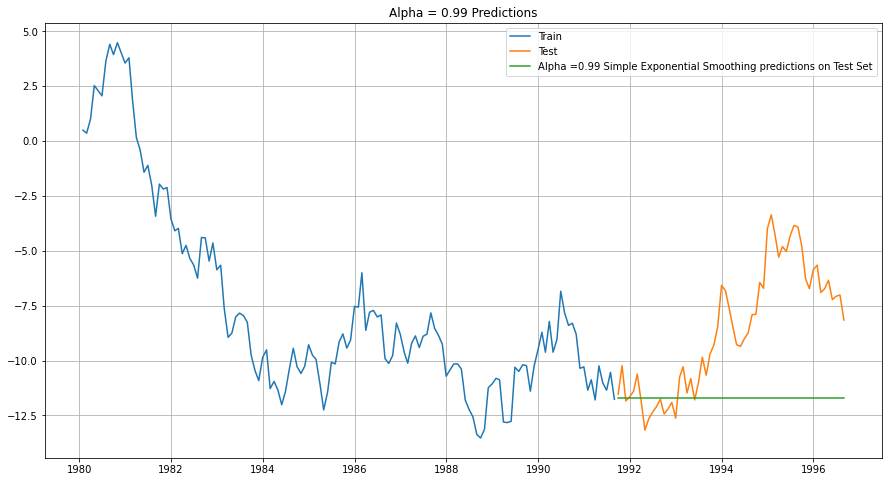

In [50]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha =0.99 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha = 0.99 Predictions');

In [51]:
## Mean Absolute Percentage Error (MAPE) - Function Definition

def MAPE(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100

In [52]:
ses_single = (mean_squared_error(test.values,SES_predict.values))
print('SES RMSE:',ses_single)


SES RMSE: 17.36961404642539


In [53]:
resultsDf3 = pd.DataFrame({'RMSE': ses_single}
                           ,index=['Single Exponential Smoothening Model :'])

pd.concat([resultsDf,resultsDf1,resultsDf2, resultsDf3])

,RMSE
Linear Regression Model,17.244390
Simple Average Model :,7.866237
Moving Average Model :,0.200754
Single Exponential Smoothening Model :,17.369614


##### Double Exponential Smoothing 

In [54]:
# Initializing the Double Exponential Smoothing Model
model_DES = Holt(train,initialization_method='estimated')
# Fitting the model
model_DES = model_DES.fit()

print('')
print('==Holt model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_DES.params)


==Holt model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.9290099438279278, 'smoothing_trend': 1.2038878171053947e-12, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 0.5851495080735627, 'initial_trend': -0.08764431250316364, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [55]:
# Forecasting using this model for the duration of the test set
DES_predict =  model_DES.forecast(len(test))
DES_predict

1991-09-30   -11.774938
1991-10-31   -11.862582
1991-11-30   -11.950226
1991-12-31   -12.037871
1992-01-31   -12.125515
1992-02-29   -12.213159
1992-03-31   -12.300804
1992-04-30   -12.388448
1992-05-31   -12.476092
1992-06-30   -12.563737
1992-07-31   -12.651381
1992-08-31   -12.739025
1992-09-30   -12.826670
1992-10-31   -12.914314
1992-11-30   -13.001958
1992-12-31   -13.089603
1993-01-31   -13.177247
1993-02-28   -13.264891
1993-03-31   -13.352535
1993-04-30   -13.440180
1993-05-31   -13.527824
1993-06-30   -13.615468
1993-07-31   -13.703113
1993-08-31   -13.790757
1993-09-30   -13.878401
1993-10-31   -13.966046
1993-11-30   -14.053690
1993-12-31   -14.141334
1994-01-31   -14.228979
1994-02-28   -14.316623
1994-03-31   -14.404267
1994-04-30   -14.491912
1994-05-31   -14.579556
1994-06-30   -14.667200
1994-07-31   -14.754844
1994-08-31   -14.842489
1994-09-30   -14.930133
1994-10-31   -15.017777
1994-11-30   -15.105422
1994-12-31   -15.193066
1995-01-31   -15.280710
1995-02-28   -15

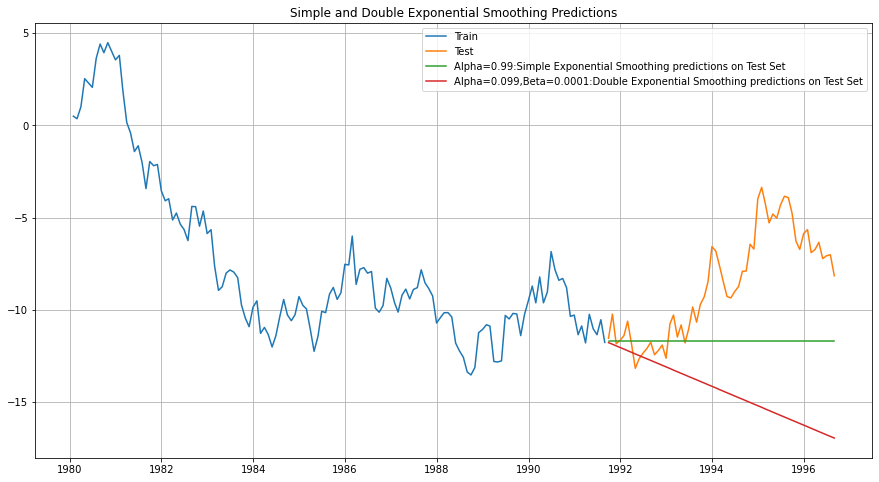

In [56]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha=0.99:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Alpha=0.099,Beta=0.0001:Double Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple and Double Exponential Smoothing Predictions');

In [168]:
des_single = (mean_squared_error(test.values,DES_predict.values, squared=False))
              
print('DES RMSE:', des_single)

DES RMSE: 7.094577173205667


In [169]:
resultsDf4 = pd.DataFrame({'RMSE': des_single}
                           ,index=['Double Exponential Smoothening Model'])

pd.concat([resultsDf,resultsDf1,resultsDf2, resultsDf3, resultsDf4])

,RMSE
Linear Regression Model,17.244390
Simple Average Model :,7.866237
Moving Average Model :,0.200754
Single Exponential Smoothening Model :,17.369614
Double Exponential Smoothening Model,7.094577


#### Triple Exponential Smoothing - Holt-Winters - ETS(A, A, A) - Holt Winter's linear method with additive errors

In [59]:
# Initializing the Double Exponential Smoothing Model
model_TES = ExponentialSmoothing(train,trend='additive',seasonal='additive',initialization_method='estimated')
# Fitting the model
model_TES = model_TES.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES.params)


==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.9235724810888114, 'smoothing_trend': 3.883069087268233e-10, 'smoothing_seasonal': 7.130725620174906e-11, 'damping_trend': nan, 'initial_level': 0.5552841433560638, 'initial_trend': -0.08707545475014859, 'initial_seasons': array([ 0.05803019, -0.27450503, -0.81017978, -0.6406654 , -0.80090679,
       -0.20941599, -0.08985007, -0.04242503, -0.12851578, -0.37359286,
        0.00646411,  0.0455547 ]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [60]:
# Forecasting using this model for the duration of the test set
TES_predict =  model_TES.forecast(len(test))
TES_predict

1991-09-30   -11.850311
1991-10-31   -12.182464
1991-11-30   -11.889482
1991-12-31   -11.937467
1992-01-31   -12.012067
1992-02-29   -12.431678
1992-03-31   -13.054428
1992-04-30   -12.971989
1992-05-31   -13.219306
1992-06-30   -12.714891
1992-07-31   -12.682400
1992-08-31   -12.722051
1992-09-30   -12.895217
1992-10-31   -13.227369
1992-11-30   -12.934388
1992-12-31   -12.982373
1993-01-31   -13.056973
1993-02-28   -13.476583
1993-03-31   -14.099333
1993-04-30   -14.016895
1993-05-31   -14.264211
1993-06-30   -13.759796
1993-07-31   -13.727306
1993-08-31   -13.766956
1993-09-30   -13.940122
1993-10-31   -14.272275
1993-11-30   -13.979293
1993-12-31   -14.027278
1994-01-31   -14.101878
1994-02-28   -14.521489
1994-03-31   -15.144239
1994-04-30   -15.061800
1994-05-31   -15.309117
1994-06-30   -14.804702
1994-07-31   -14.772211
1994-08-31   -14.811861
1994-09-30   -14.985028
1994-10-31   -15.317180
1994-11-30   -15.024199
1994-12-31   -15.072184
1995-01-31   -15.146784
1995-02-28   -15

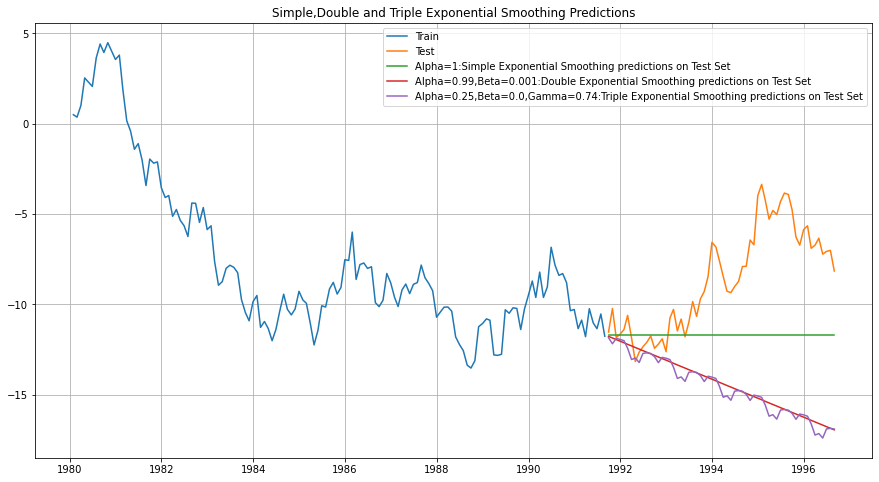

In [61]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha=1:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Alpha=0.99,Beta=0.001:Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict, label='Alpha=0.25,Beta=0.0,Gamma=0.74:Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions');

In [170]:
tes = (mean_squared_error(test.values,TES_predict.values, squared=False))

print('TES RMSE:',tes)

TES RMSE: 7.252973265474294


In [171]:
resultsDf5 = pd.DataFrame({'RMSE': tes}
                           ,index=['Triple Exponential Smoothening Model Additive:'])

pd.concat([resultsDf,resultsDf1,resultsDf2, resultsDf3, resultsDf4, resultsDf5])

,RMSE
Linear Regression Model,17.244390
Simple Average Model :,7.866237
Moving Average Model :,0.200754
Single Exponential Smoothening Model :,17.369614
Double Exponential Smoothening Model,7.094577
Triple Exponential Smoothening Model Additive:,7.252973


#### Triple Exponential Smoothing - Holt-Winters - ETS(A, A, M) - Holt Winter's linear method 

In [64]:
# Initializing the Double Exponential Smoothing Model
model_TES_am = ExponentialSmoothing(train,trend='add',seasonal='additive',initialization_method='estimated')
# Fitting the model
model_TES_am = model_TES_am.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES_am.params)


==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.9235724810888114, 'smoothing_trend': 3.883069087268233e-10, 'smoothing_seasonal': 7.130725620174906e-11, 'damping_trend': nan, 'initial_level': 0.5552841433560638, 'initial_trend': -0.08707545475014859, 'initial_seasons': array([ 0.05803019, -0.27450503, -0.81017978, -0.6406654 , -0.80090679,
       -0.20941599, -0.08985007, -0.04242503, -0.12851578, -0.37359286,
        0.00646411,  0.0455547 ]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [65]:
# Forecasting using this model for the duration of the test set
TES_predict_am =  model_TES_am.forecast(len(test))
TES_predict_am

1991-09-30   -11.850311
1991-10-31   -12.182464
1991-11-30   -11.889482
1991-12-31   -11.937467
1992-01-31   -12.012067
1992-02-29   -12.431678
1992-03-31   -13.054428
1992-04-30   -12.971989
1992-05-31   -13.219306
1992-06-30   -12.714891
1992-07-31   -12.682400
1992-08-31   -12.722051
1992-09-30   -12.895217
1992-10-31   -13.227369
1992-11-30   -12.934388
1992-12-31   -12.982373
1993-01-31   -13.056973
1993-02-28   -13.476583
1993-03-31   -14.099333
1993-04-30   -14.016895
1993-05-31   -14.264211
1993-06-30   -13.759796
1993-07-31   -13.727306
1993-08-31   -13.766956
1993-09-30   -13.940122
1993-10-31   -14.272275
1993-11-30   -13.979293
1993-12-31   -14.027278
1994-01-31   -14.101878
1994-02-28   -14.521489
1994-03-31   -15.144239
1994-04-30   -15.061800
1994-05-31   -15.309117
1994-06-30   -14.804702
1994-07-31   -14.772211
1994-08-31   -14.811861
1994-09-30   -14.985028
1994-10-31   -15.317180
1994-11-30   -15.024199
1994-12-31   -15.072184
1995-01-31   -15.146784
1995-02-28   -15

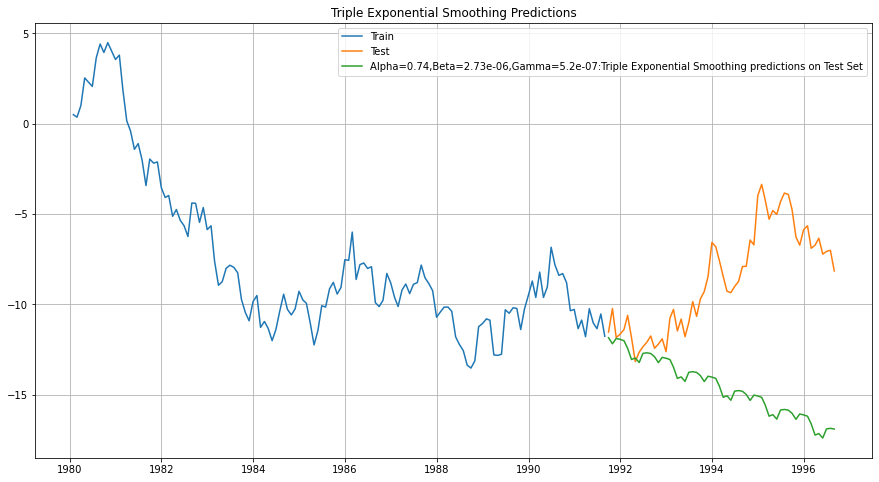

In [66]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')


plt.plot(TES_predict_am, label='Alpha=0.74,Beta=2.73e-06,Gamma=5.2e-07:Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Triple Exponential Smoothing Predictions');

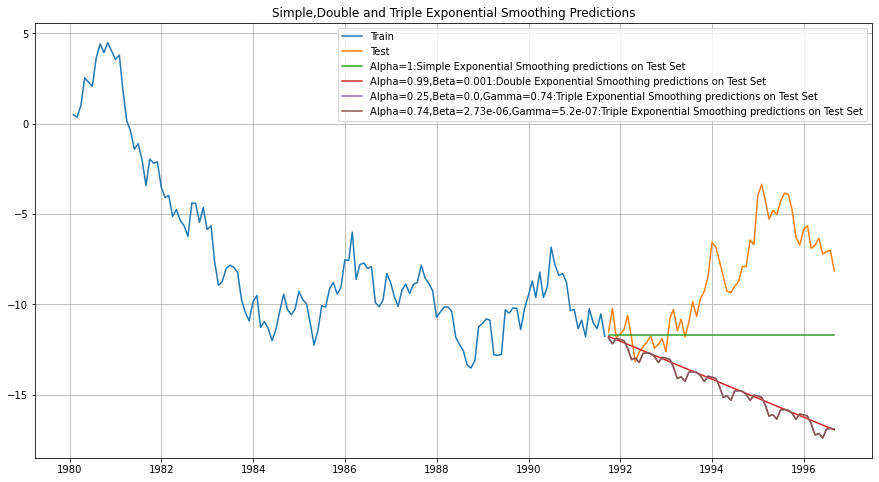

In [67]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha=1:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Alpha=0.99,Beta=0.001:Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict, label='Alpha=0.25,Beta=0.0,Gamma=0.74:Triple Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict_am, label='Alpha=0.74,Beta=2.73e-06,Gamma=5.2e-07:Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions');

In [172]:
tes_am = (mean_squared_error(test.values,TES_predict_am.values, squared=False))

print('TES_am RMSE:',tes_am)

TES_am RMSE: 7.252973265474294


In [173]:
resultsDf6 = pd.DataFrame({'RMSE': tes_am}
                           ,index=['Triple Exponential Smoothening Model Multiplicative:'])

pd.concat([resultsDf,resultsDf1,resultsDf2, resultsDf3, resultsDf4, resultsDf5, resultsDf6])

,RMSE
Linear Regression Model,17.244390
Simple Average Model :,7.866237
Moving Average Model :,0.200754
Single Exponential Smoothening Model :,17.369614
Double Exponential Smoothening Model,7.094577
Triple Exponential Smoothening Model Additive:,7.252973
Triple Exponential Smoothening Model Multiplicative:,7.252973


# Check for Stationarity

Running Augmented Dicky Fuller Test with: 

Null Hypothesis:Time Series is not stationary.

Alternate Hypothesis:Time Series is stationary.

In [174]:
from statsmodels.tsa.stattools import adfuller
dftest = adfuller(df)#python implementation of dicky fuller test 
dftest
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is %1.4f' %dftest[1])

DF test statistic is -2.307
DF test p-value is 0.1696


p > 0.05, thus is not a stationary series.

Text(0, 0.5, 'Rose')

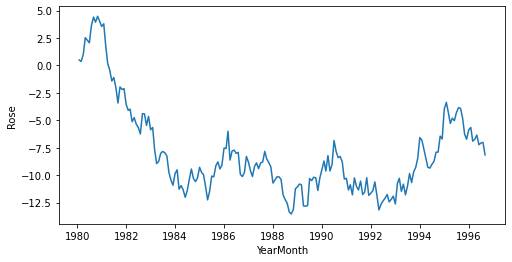

In [175]:
#Non differenced full data Time series
plt.figure(figsize=(8, 4))
plt.plot(df)
plt.xlabel('YearMonth')
plt.ylabel('Rose')

Performing differencing ( d=1 ) as the data is non-stationary

Text(0, 0.5, 'Rose')

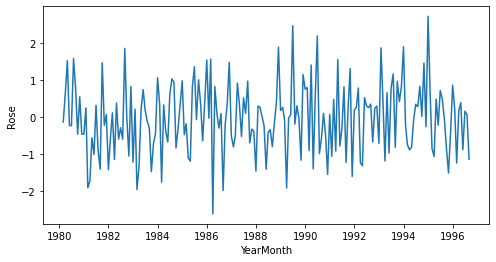

In [176]:
plt.figure(figsize=(8, 4))
x = df.diff(periods=1)
plt.plot(x)
plt.xlabel('YearMonth')
plt.ylabel('Rose')

We observe seasonality even after differencing. Meaning the variance in the data seemss to be increasing.

# Model Building - Stationary Data

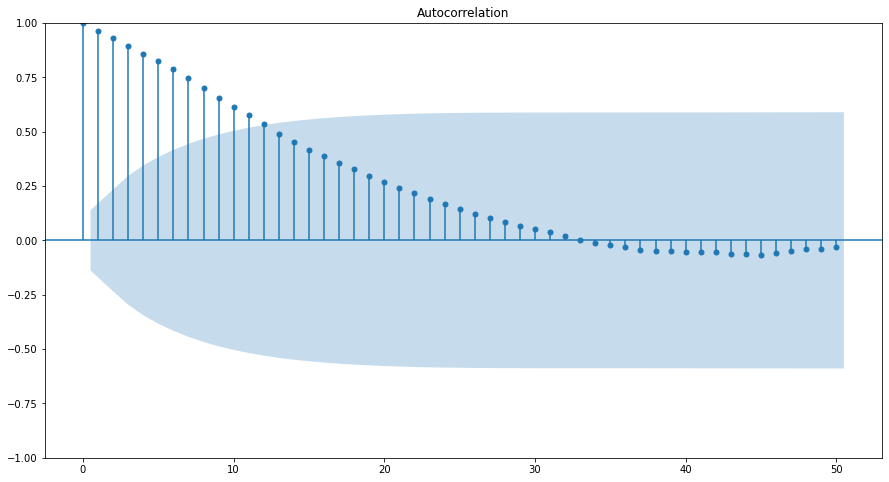

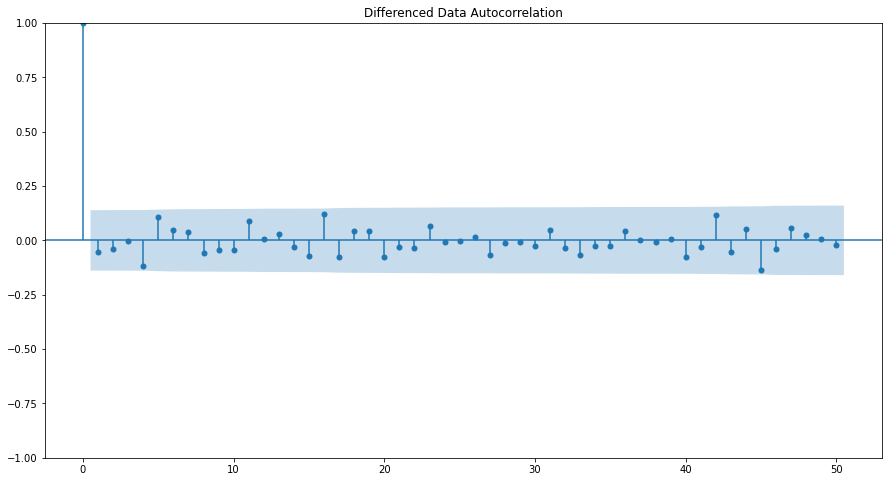

In [177]:
#Plotting the Autocorrelation function plots on the whole data
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(df['Rose'],lags=50)
plot_acf(df['Rose'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

In [178]:
# Define the p parameter to take any value between 0 and 2
p= range(1,4)
# Define the q parameter to take any value between 0 and 2
q = range(1, 4)

In [179]:
import itertools
d= range(0,2)

#Generate all different combinations of p with d=0 and q=0 triplets for AR model building
pdq_ar = list(itertools.product(p, range(1), range(1)))

#Generate all different combinations of p,q with d=0 triplets for ARMA model building
pdq_arma = list(itertools.product(p, range(1),q))

#Generate all different combinations of p, d and q triplets for ARIMA model building 
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal P,D,Q triplets for SARIMA model building
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]


In [180]:
pdq_ar

[(1, 0, 0), (2, 0, 0), (3, 0, 0)]

In [181]:
pdq_arma

[(1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (3, 0, 1),
 (3, 0, 2),
 (3, 0, 3)]

In [182]:
pdq

[(1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (3, 0, 1),
 (3, 0, 2),
 (3, 0, 3),
 (3, 1, 1),
 (3, 1, 2),
 (3, 1, 3)]

In [183]:
seasonal_pdq
# as it seems to have 12 month seasonality as confirmned from above 

[(1, 0, 1, 12),
 (1, 0, 2, 12),
 (1, 0, 3, 12),
 (1, 1, 1, 12),
 (1, 1, 2, 12),
 (1, 1, 3, 12),
 (2, 0, 1, 12),
 (2, 0, 2, 12),
 (2, 0, 3, 12),
 (2, 1, 1, 12),
 (2, 1, 2, 12),
 (2, 1, 3, 12),
 (3, 0, 1, 12),
 (3, 0, 2, 12),
 (3, 0, 3, 12),
 (3, 1, 1, 12),
 (3, 1, 2, 12),
 (3, 1, 3, 12)]

In [184]:
dftest = adfuller(train['Rose'])#Stationarity check on train time series data 
dftest
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is %1.4f' %dftest[1])

DF test statistic is -1.756
DF test p-value is 0.4024


In [185]:
#Using the log transformed series as there is variance in the data
train_sales_ts_log = np.log10(train['Rose'])
#Log transformation on the training data to make the time series stationary as we did with full data 

D:\Anaconda\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [186]:
best_aic = np.inf
best_pdq = None
best_seasonal_pdq = None
temp_model = None

# AR Model

In [187]:
# Creating an empty Dataframe with column names only
AR_AIC = pd.DataFrame(columns=['param', 'AIC'])
AR_AIC

,param,AIC


In [188]:
from statsmodels.tsa.arima.model import ARIMA

for param in pdq_ar:
    ARIMA_model = ARIMA(train_sales_ts_log,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    AR_AIC = AR_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

ARIMA(1, 0, 0) - AIC:16.559855003568973


C:\Users\AISHWARYA HARIHARAN\AppData\Local\Temp\ipykernel_14364\1950219028.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  AR_AIC = AR_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)


ARIMA(2, 0, 0) - AIC:15.07302938523716


C:\Users\AISHWARYA HARIHARAN\AppData\Local\Temp\ipykernel_14364\1950219028.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  AR_AIC = AR_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)


ARIMA(3, 0, 0) - AIC:15.946271001844067


C:\Users\AISHWARYA HARIHARAN\AppData\Local\Temp\ipykernel_14364\1950219028.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  AR_AIC = AR_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)


In [189]:
#Building AR model with best 'p' parameter 
best_model = ARIMA(train_sales_ts_log,order = (2,0,0))#p=2 with lowest AIC 
best_results = best_model.fit()

In [190]:
print(best_results.summary().tables[0])
print(best_results.summary().tables[1])

                               SARIMAX Results                                
Dep. Variable:                   Rose   No. Observations:                  140
Model:                 ARIMA(2, 0, 0)   Log Likelihood                  -3.537
Date:                Sun, 02 Jun 2024   AIC                             15.073
Time:                        17:48:49   BIC                             26.840
Sample:                    01-31-1980   HQIC                            19.855
                         - 08-31-1991                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1654      0.289      0.572      0.567      -0.401       0.732
ar.L1          1.3089      0.571      2.293      0.022       0.190       2.427
ar.L2         -0.6827      0.613     -1.114      0.2

In [191]:
#Calculating RMSE for best AR model
pred_dynamic = best_results.get_prediction(start=pd.to_datetime('1996-09-01'), dynamic=True, full_results=True)

D:\Anaconda\lib\site-packages\statsmodels\tsa\statespace\kalman_filter.py:2290: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  warn('Dynamic prediction specified to begin during'


In [192]:
pred99 = best_results.get_forecast(steps=len(test), alpha=0.1)#forecasting values 

In [193]:
# Extract the predicted and true values of our time series
sales_ts_forecasted = pred_dynamic.predicted_mean
testCopy1 = test.copy()
testCopy1['sales_ts_forecasted'] = np.power(10, pred99.predicted_mean)

In [194]:
# Compute the root mean square error
mse = ((testCopy1['Rose'] - testCopy1['sales_ts_forecasted']) ** 2).mean()
rmse = np.sqrt(mse)
print('The Root Mean Squared Error of our forecasts is {}'.format(round(rmse, 3)))

The Root Mean Squared Error of our forecasts is 10.456


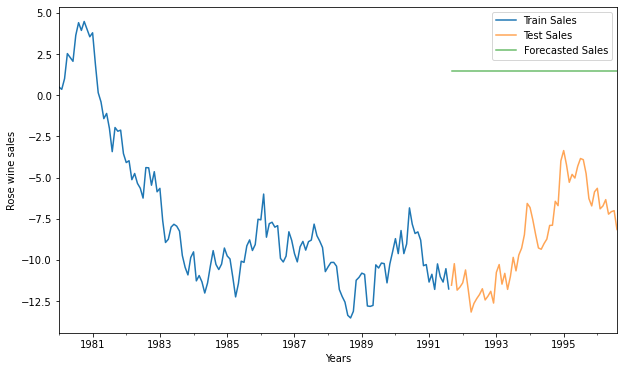

In [195]:
axis = train['Rose'].plot(label='Train Sales', figsize=(10, 6))
testCopy1['Rose'].plot(ax=axis, label='Test Sales', alpha=0.7)
testCopy1['sales_ts_forecasted'].plot(ax=axis, label='Forecasted Sales', alpha=0.7)
axis.set_xlabel('Years')
axis.set_ylabel('Rose wine sales')
plt.legend(loc='best')
plt.show()
plt.close()

In [196]:
resultsDf7 = pd.DataFrame({'RMSE': rmse}
                           ,index=['Best AR Model :'])

pd.concat([resultsDf,resultsDf1,resultsDf2, resultsDf3, resultsDf4, resultsDf5, resultsDf6, resultsDf7])

,RMSE
Linear Regression Model,17.244390
Simple Average Model :,7.866237
Moving Average Model :,0.200754
Single Exponential Smoothening Model :,17.369614
Double Exponential Smoothening Model,7.094577
Triple Exponential Smoothening Model Additive:,7.252973
Triple Exponential Smoothening Model Multiplicative:,7.252973
Best AR Model :,10.455958


### ARMA Model

In [197]:
# Creating an empty Dataframe with column names only
ARMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARMA_AIC

,param,AIC


In [198]:
from statsmodels.tsa.arima.model import ARIMA

for param in pdq_arma:
    ARIMA_model = ARIMA(train_sales_ts_log,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARMA_AIC =ARMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

ARIMA(1, 0, 1) - AIC:12.88829059568016


C:\Users\AISHWARYA HARIHARAN\AppData\Local\Temp\ipykernel_14364\935708406.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARMA_AIC =ARMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
D:\Anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
D:\Anaconda\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\AISHWARYA HARIHARAN\AppData\Local\Temp\ipykernel_14364\935708406.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARMA_AIC =ARMA_AIC.append({'param':param, 'AIC': AR

ARIMA(1, 0, 2) - AIC:11.544533815363334


D:\Anaconda\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\AISHWARYA HARIHARAN\AppData\Local\Temp\ipykernel_14364\935708406.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARMA_AIC =ARMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)


ARIMA(1, 0, 3) - AIC:10.274451375869718
ARIMA(2, 0, 1) - AIC:12.157618802846851


C:\Users\AISHWARYA HARIHARAN\AppData\Local\Temp\ipykernel_14364\935708406.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARMA_AIC =ARMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
D:\Anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
D:\Anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
D:\Anaconda\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\AISHWARYA HARIHARAN

ARIMA(2, 0, 2) - AIC:11.949287808115821


D:\Anaconda\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\AISHWARYA HARIHARAN\AppData\Local\Temp\ipykernel_14364\935708406.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARMA_AIC =ARMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)


ARIMA(2, 0, 3) - AIC:11.948656612804063


D:\Anaconda\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\AISHWARYA HARIHARAN\AppData\Local\Temp\ipykernel_14364\935708406.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARMA_AIC =ARMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
D:\Anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
D:\Anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(3, 0, 1) - AIC:13.144744343014779


D:\Anaconda\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\AISHWARYA HARIHARAN\AppData\Local\Temp\ipykernel_14364\935708406.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARMA_AIC =ARMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
D:\Anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
D:\Anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(3, 0, 2) - AIC:13.77762863208754
ARIMA(3, 0, 3) - AIC:15.05446692877295


D:\Anaconda\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\AISHWARYA HARIHARAN\AppData\Local\Temp\ipykernel_14364\935708406.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARMA_AIC =ARMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)


In [199]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARMA_AIC.sort_values(by='AIC',ascending=True).head()

,param,AIC
2,"(1, 0, 3)",10.274451
1,"(1, 0, 2)",11.544534
5,"(2, 0, 3)",11.948657
4,"(2, 0, 2)",11.949288
3,"(2, 0, 1)",12.157619


In [200]:
#Building ARMA model with best p,q parameter
best_model = ARIMA(train_sales_ts_log,order = (1,0,3))
best_results = best_model.fit()

D:\Anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
D:\Anaconda\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [201]:
print(best_results.summary().tables[0])
print(best_results.summary().tables[1])

                               SARIMAX Results                                
Dep. Variable:                   Rose   No. Observations:                  140
Model:                 ARIMA(1, 0, 3)   Log Likelihood                   0.863
Date:                Sun, 02 Jun 2024   AIC                             10.274
Time:                        17:48:56   BIC                             27.924
Sample:                    01-31-1980   HQIC                            17.447
                         - 08-31-1991                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0060      0.539     -0.011      0.991      -1.062       1.050
ar.L1          0.2889      0.995      0.290      0.772      -1.662       2.240
ma.L1          2.3903    155.685      0.015      0.9

In [202]:
#Calculating RMSE for best MA model 
pred_dynamic = best_results.get_prediction(start=pd.to_datetime('1996-09-01'), dynamic=True, full_results=True)

D:\Anaconda\lib\site-packages\statsmodels\tsa\statespace\kalman_filter.py:2290: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  warn('Dynamic prediction specified to begin during'


In [203]:
pred99 = best_results.get_forecast(steps=len(test), alpha=0.1)#forecasting values 

In [204]:
# Extract the predicted and true values of our time series
sales_ts_forecasted = pred_dynamic.predicted_mean
testCopy1 = test.copy()
testCopy1['sales_ts_forecasted'] = np.power(10, pred99.predicted_mean)

In [205]:
# Compute the root mean square error
mse = ((testCopy1['Rose'] - testCopy1['sales_ts_forecasted']) ** 2).mean()
rmse = np.sqrt(mse)
print('The Root Mean Squared Error of our forecasts is {}'.format(round(rmse, 3)))

The Root Mean Squared Error of our forecasts is 9.997


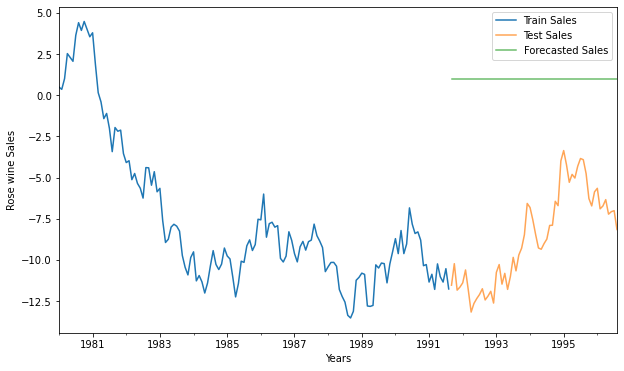

In [206]:
axis = train['Rose'].plot(label='Train Sales', figsize=(10, 6))
testCopy1['Rose'].plot(ax=axis, label='Test Sales', alpha=0.7)
testCopy1['sales_ts_forecasted'].plot(ax=axis, label='Forecasted Sales', alpha=0.7)
axis.set_xlabel('Years')
axis.set_ylabel('Rose wine Sales')
plt.legend(loc='best')
plt.show()
plt.close()

In [207]:
resultsDf8 = pd.DataFrame({'RMSE': rmse}
                           ,index=['Best ARMA Model:'])

pd.concat([resultsDf,resultsDf1,resultsDf2, resultsDf3, resultsDf4, resultsDf5, resultsDf6, resultsDf7, resultsDf8])

,RMSE
Linear Regression Model,17.244390
Simple Average Model :,7.866237
Moving Average Model :,0.200754
Single Exponential Smoothening Model :,17.369614
Double Exponential Smoothening Model,7.094577
Triple Exponential Smoothening Model Additive:,7.252973
Triple Exponential Smoothening Model Multiplicative:,7.252973
Best AR Model :,10.455958
Best ARMA Model:,9.997065


### ARIMA Model 

##### Auto ARIMA

In [208]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 2
## We have kept the value of d as 1 as we need to take a difference of the series to make it stationary.

import itertools
p = q = range(0, 3)
d= range(0,1)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 0, 1)
Model: (0, 0, 2)
Model: (1, 0, 0)
Model: (1, 0, 1)
Model: (1, 0, 2)
Model: (2, 0, 0)
Model: (2, 0, 1)
Model: (2, 0, 2)


In [209]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

,param,AIC


In [210]:
from statsmodels.tsa.arima.model import ARIMA

for param in pdq:
    ARIMA_model = ARIMA(train['Rose'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

ARIMA(0, 0, 0) - AIC:818.315131008244
ARIMA(0, 0, 1) - AIC:659.9536456958525


C:\Users\AISHWARYA HARIHARAN\AppData\Local\Temp\ipykernel_14364\1652561359.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
C:\Users\AISHWARYA HARIHARAN\AppData\Local\Temp\ipykernel_14364\1652561359.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)


ARIMA(0, 0, 2) - AIC:583.5961415744828


C:\Users\AISHWARYA HARIHARAN\AppData\Local\Temp\ipykernel_14364\1652561359.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)


ARIMA(1, 0, 0) - AIC:390.15300031621496


C:\Users\AISHWARYA HARIHARAN\AppData\Local\Temp\ipykernel_14364\1652561359.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)


ARIMA(1, 0, 1) - AIC:391.8099198352729


C:\Users\AISHWARYA HARIHARAN\AppData\Local\Temp\ipykernel_14364\1652561359.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)


ARIMA(1, 0, 2) - AIC:393.80980276432956


C:\Users\AISHWARYA HARIHARAN\AppData\Local\Temp\ipykernel_14364\1652561359.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)


ARIMA(2, 0, 0) - AIC:391.81050257488585


C:\Users\AISHWARYA HARIHARAN\AppData\Local\Temp\ipykernel_14364\1652561359.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)


ARIMA(2, 0, 1) - AIC:393.8018031999684


C:\Users\AISHWARYA HARIHARAN\AppData\Local\Temp\ipykernel_14364\1652561359.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
D:\Anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
D:\Anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(2, 0, 2) - AIC:392.02971660049957


C:\Users\AISHWARYA HARIHARAN\AppData\Local\Temp\ipykernel_14364\1652561359.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)


In [211]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARIMA_AIC.sort_values(by='AIC',ascending=True)

,param,AIC
3,"(1, 0, 0)",390.153
4,"(1, 0, 1)",391.80992
6,"(2, 0, 0)",391.810503
8,"(2, 0, 2)",392.029717
7,"(2, 0, 1)",393.801803
5,"(1, 0, 2)",393.809803
2,"(0, 0, 2)",583.596142
1,"(0, 0, 1)",659.953646
0,"(0, 0, 0)",818.315131


In [212]:
auto_ARIMA = ARIMA(train['Rose'], order=(1,0,0))

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:                   Rose   No. Observations:                  140
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -192.077
Date:                Sun, 02 Jun 2024   AIC                            390.153
Time:                        17:49:01   BIC                            398.978
Sample:                    01-31-1980   HQIC                           393.739
                         - 08-31-1991                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -6.7347      2.937     -2.293      0.022     -12.491      -0.979
ar.L1          0.9825      0.017     58.723      0.000       0.950       1.015
sigma2         0.8887      0.111      7.982      0.0

In [213]:
#Predict on the Test Set using this model and evaluate the model.
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))

In [214]:
from sklearn.metrics import  mean_squared_error
rmse = mean_squared_error(test['Rose'],predicted_auto_ARIMA)
print(rmse)

5.800267100867274


In [215]:
temp_resultsDf0 = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['ARIMA(2,1,2)'])
temp_resultsDf0

,RMSE
"ARIMA(2,1,2)",5.800267


#### Manual ARIMA 

In [216]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

,param,AIC


In [217]:
#Building ARIMA model with best parameters p,d,q

best_model = ARIMA(train_sales_ts_log,order = (0,1,2))
best_results = best_model.fit()

D:\Anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [218]:
print(best_results.summary().tables[0])
print(best_results.summary().tables[1])

                               SARIMAX Results                                
Dep. Variable:                   Rose   No. Observations:                  140
Model:                 ARIMA(0, 1, 2)   Log Likelihood                  -0.223
Date:                Sun, 02 Jun 2024   AIC                              6.447
Time:                        17:49:02   BIC                             15.250
Sample:                    01-31-1980   HQIC                            10.024
                         - 08-31-1991                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          1.9592     67.507      0.029      0.977    -130.352     134.270
ma.L2          0.9970     68.990      0.014      0.988    -134.221     136.215
sigma2         0.0358      2.458      0.015      0.9

In [219]:
#Calculating RMSE for best ARIMA model 
pred_dynamic = best_results.get_prediction(start=pd.to_datetime('1996-09-01'), dynamic=True, full_results=True)

D:\Anaconda\lib\site-packages\statsmodels\tsa\statespace\kalman_filter.py:2290: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  warn('Dynamic prediction specified to begin during'


In [220]:
pred99 = best_results.get_forecast(steps=len(test), alpha=0.1)#forecasting values 

In [221]:
# Extract the predicted and true values of our time series
sales_ts_forecasted = pred_dynamic.predicted_mean
testCopy1 = test.copy()
testCopy1['sales_ts_forecasted'] = np.power(10, pred99.predicted_mean)

In [222]:
# Compute the root mean square error
mse = ((testCopy1['Rose'] - testCopy1['sales_ts_forecasted']) ** 2).mean()
rmse = np.sqrt(mse)
print('The Root Mean Squared Error of our forecasts is {}'.format(round(rmse, 3)))

The Root Mean Squared Error of our forecasts is 9.058


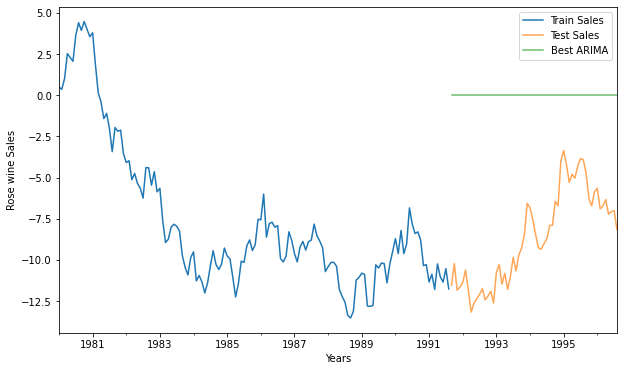

In [223]:
axis = train['Rose'].plot(label='Train Sales', figsize=(10, 6))
testCopy1['Rose'].plot(ax=axis, label='Test Sales', alpha=0.7)
testCopy1['sales_ts_forecasted'].plot(ax=axis, label='Best ARIMA', alpha=0.7)
axis.set_xlabel('Years')
axis.set_ylabel('Rose wine Sales')
plt.legend(loc='best')
plt.show()
plt.close()

In [224]:
resultsDf9 = pd.DataFrame({'RMSE': rmse}
                           ,index=['Best ARIMA Model : '])

pd.concat([resultsDf,resultsDf1,resultsDf2, resultsDf3, resultsDf4, resultsDf5, resultsDf6, resultsDf7, resultsDf8, resultsDf9])

,RMSE
Linear Regression Model,17.244390
Simple Average Model :,7.866237
Moving Average Model :,0.200754
Single Exponential Smoothening Model :,17.369614
Double Exponential Smoothening Model,7.094577
Triple Exponential Smoothening Model Additive:,7.252973
Triple Exponential Smoothening Model Multiplicative:,7.252973
Best AR Model :,10.455958
Best ARMA Model:,9.997065
Best ARIMA Model :,9.057812


### SARIMA Model

### Auto SARIMA 

In [225]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

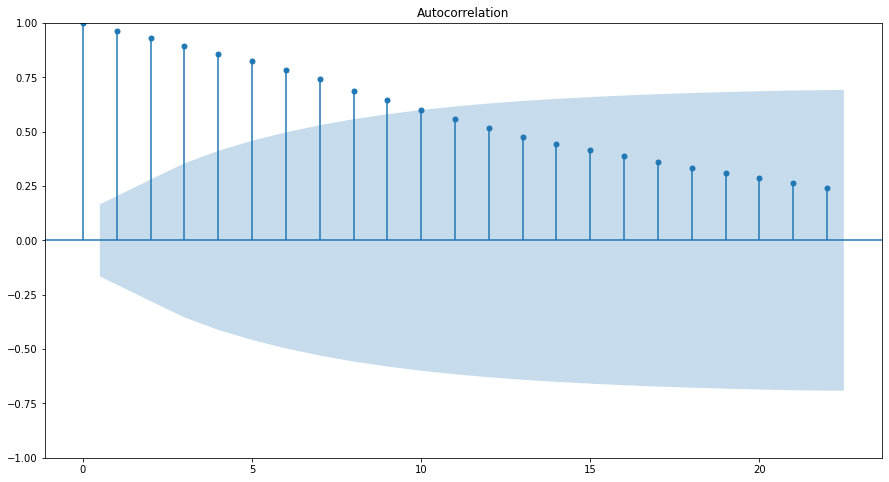

In [226]:
plot_acf(train['Rose'],alpha=0.05);

In [227]:
#Setting the seasonality as 12 to estimate parametrs using auto SARIMA model.

In [228]:
import itertools
p = q = range(0,3)
d= range(0,1)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 0, 1)(0, 0, 1, 12)
Model: (0, 0, 2)(0, 0, 2, 12)
Model: (1, 0, 0)(1, 0, 0, 12)
Model: (1, 0, 1)(1, 0, 1, 12)
Model: (1, 0, 2)(1, 0, 2, 12)
Model: (2, 0, 0)(2, 0, 0, 12)
Model: (2, 0, 1)(2, 0, 1, 12)
Model: (2, 0, 2)(2, 0, 2, 12)


In [229]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

,param,seasonal,AIC


In [230]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 0, 0)x(0, 0, 0, 12) - AIC:1002.5432439443977
SARIMA(0, 0, 0)x(0, 0, 1, 12) - AIC:808.6843549753786


C:\Users\AISHWARYA HARIHARAN\AppData\Local\Temp\ipykernel_14364\2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\AISHWARYA HARIHARAN\AppData\Local\Temp\ipykernel_14364\2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 0, 0)x(0, 0, 2, 12) - AIC:679.6372066276732
SARIMA(0, 0, 0)x(1, 0, 0, 12) - AIC:657.0600926658162


C:\Users\AISHWARYA HARIHARAN\AppData\Local\Temp\ipykernel_14364\2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\AISHWARYA HARIHARAN\AppData\Local\Temp\ipykernel_14364\2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 0, 0)x(1, 0, 1, 12) - AIC:649.9250818474713


C:\Users\AISHWARYA HARIHARAN\AppData\Local\Temp\ipykernel_14364\2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 0, 0)x(1, 0, 2, 12) - AIC:551.6417307950645
SARIMA(0, 0, 0)x(2, 0, 0, 12) - AIC:572.8889021376708


C:\Users\AISHWARYA HARIHARAN\AppData\Local\Temp\ipykernel_14364\2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\AISHWARYA HARIHARAN\AppData\Local\Temp\ipykernel_14364\2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 0, 0)x(2, 0, 1, 12) - AIC:536.045318368694


C:\Users\AISHWARYA HARIHARAN\AppData\Local\Temp\ipykernel_14364\2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 0, 0)x(2, 0, 2, 12) - AIC:491.3216363634249


C:\Users\AISHWARYA HARIHARAN\AppData\Local\Temp\ipykernel_14364\2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 0, 1)x(0, 0, 0, 12) - AIC:822.8638682572819


C:\Users\AISHWARYA HARIHARAN\AppData\Local\Temp\ipykernel_14364\2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 0, 1)x(0, 0, 1, 12) - AIC:656.6520459484635


C:\Users\AISHWARYA HARIHARAN\AppData\Local\Temp\ipykernel_14364\2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 0, 1)x(0, 0, 2, 12) - AIC:573.9255471314912


C:\Users\AISHWARYA HARIHARAN\AppData\Local\Temp\ipykernel_14364\2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 0, 1)x(1, 0, 0, 12) - AIC:551.727035814575


C:\Users\AISHWARYA HARIHARAN\AppData\Local\Temp\ipykernel_14364\2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 0, 1)x(1, 0, 1, 12) - AIC:545.6328647596952


C:\Users\AISHWARYA HARIHARAN\AppData\Local\Temp\ipykernel_14364\2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 0, 1)x(1, 0, 2, 12) - AIC:456.71515695082775


C:\Users\AISHWARYA HARIHARAN\AppData\Local\Temp\ipykernel_14364\2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 0, 1)x(2, 0, 0, 12) - AIC:492.3485385519275


C:\Users\AISHWARYA HARIHARAN\AppData\Local\Temp\ipykernel_14364\2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 0, 1)x(2, 0, 1, 12) - AIC:460.8535138661536


C:\Users\AISHWARYA HARIHARAN\AppData\Local\Temp\ipykernel_14364\2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 0, 1)x(2, 0, 2, 12) - AIC:484.0085155059808


C:\Users\AISHWARYA HARIHARAN\AppData\Local\Temp\ipykernel_14364\2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 0, 2)x(0, 0, 0, 12) - AIC:709.1421146117576


C:\Users\AISHWARYA HARIHARAN\AppData\Local\Temp\ipykernel_14364\2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 0, 2)x(0, 0, 1, 12) - AIC:577.6127989463782


C:\Users\AISHWARYA HARIHARAN\AppData\Local\Temp\ipykernel_14364\2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 0, 2)x(0, 0, 2, 12) - AIC:519.2390156564929


C:\Users\AISHWARYA HARIHARAN\AppData\Local\Temp\ipykernel_14364\2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 0, 2)x(1, 0, 0, 12) - AIC:511.772748684941


C:\Users\AISHWARYA HARIHARAN\AppData\Local\Temp\ipykernel_14364\2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 0, 2)x(1, 0, 1, 12) - AIC:502.4931551014272


C:\Users\AISHWARYA HARIHARAN\AppData\Local\Temp\ipykernel_14364\2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 0, 2)x(1, 0, 2, 12) - AIC:414.3238609374817


C:\Users\AISHWARYA HARIHARAN\AppData\Local\Temp\ipykernel_14364\2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 0, 2)x(2, 0, 0, 12) - AIC:456.9255627205429


C:\Users\AISHWARYA HARIHARAN\AppData\Local\Temp\ipykernel_14364\2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 0, 2)x(2, 0, 1, 12) - AIC:432.1761887625635


C:\Users\AISHWARYA HARIHARAN\AppData\Local\Temp\ipykernel_14364\2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 0, 2)x(2, 0, 2, 12) - AIC:377.72918105037394
SARIMA(1, 0, 0)x(0, 0, 0, 12) - AIC:383.0256886488884


C:\Users\AISHWARYA HARIHARAN\AppData\Local\Temp\ipykernel_14364\2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\AISHWARYA HARIHARAN\AppData\Local\Temp\ipykernel_14364\2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 0)x(0, 0, 1, 12) - AIC:356.4007684223193


C:\Users\AISHWARYA HARIHARAN\AppData\Local\Temp\ipykernel_14364\2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 0)x(0, 0, 2, 12) - AIC:320.04104557534976
SARIMA(1, 0, 0)x(1, 0, 0, 12) - AIC:356.02775672683526


C:\Users\AISHWARYA HARIHARAN\AppData\Local\Temp\ipykernel_14364\2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\AISHWARYA HARIHARAN\AppData\Local\Temp\ipykernel_14364\2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 0)x(1, 0, 1, 12) - AIC:355.8398074332731


C:\Users\AISHWARYA HARIHARAN\AppData\Local\Temp\ipykernel_14364\2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 0)x(1, 0, 2, 12) - AIC:321.87802018919234


C:\Users\AISHWARYA HARIHARAN\AppData\Local\Temp\ipykernel_14364\2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 0)x(2, 0, 0, 12) - AIC:320.3854894445355


C:\Users\AISHWARYA HARIHARAN\AppData\Local\Temp\ipykernel_14364\2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 0)x(2, 0, 1, 12) - AIC:321.9746321089766


C:\Users\AISHWARYA HARIHARAN\AppData\Local\Temp\ipykernel_14364\2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 0)x(2, 0, 2, 12) - AIC:323.62001850174653
SARIMA(1, 0, 1)x(0, 0, 0, 12) - AIC:382.7812244813927


C:\Users\AISHWARYA HARIHARAN\AppData\Local\Temp\ipykernel_14364\2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\AISHWARYA HARIHARAN\AppData\Local\Temp\ipykernel_14364\2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 1)x(0, 0, 1, 12) - AIC:351.39377127510653


C:\Users\AISHWARYA HARIHARAN\AppData\Local\Temp\ipykernel_14364\2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 1)x(0, 0, 2, 12) - AIC:318.80859895355854
SARIMA(1, 0, 1)x(1, 0, 0, 12) - AIC:357.5244159477253


C:\Users\AISHWARYA HARIHARAN\AppData\Local\Temp\ipykernel_14364\2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\AISHWARYA HARIHARAN\AppData\Local\Temp\ipykernel_14364\2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 1)x(1, 0, 1, 12) - AIC:350.64257102325996


C:\Users\AISHWARYA HARIHARAN\AppData\Local\Temp\ipykernel_14364\2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 1)x(1, 0, 2, 12) - AIC:320.49277555063344


C:\Users\AISHWARYA HARIHARAN\AppData\Local\Temp\ipykernel_14364\2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 1)x(2, 0, 0, 12) - AIC:320.9026602176317


C:\Users\AISHWARYA HARIHARAN\AppData\Local\Temp\ipykernel_14364\2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 1)x(2, 0, 1, 12) - AIC:322.27237592340055


C:\Users\AISHWARYA HARIHARAN\AppData\Local\Temp\ipykernel_14364\2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 1)x(2, 0, 2, 12) - AIC:321.66132714325016
SARIMA(1, 0, 2)x(0, 0, 0, 12) - AIC:382.4117138543534


C:\Users\AISHWARYA HARIHARAN\AppData\Local\Temp\ipykernel_14364\2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\AISHWARYA HARIHARAN\AppData\Local\Temp\ipykernel_14364\2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 2)x(0, 0, 1, 12) - AIC:347.4003904287742


C:\Users\AISHWARYA HARIHARAN\AppData\Local\Temp\ipykernel_14364\2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 2)x(0, 0, 2, 12) - AIC:316.5496624855595


C:\Users\AISHWARYA HARIHARAN\AppData\Local\Temp\ipykernel_14364\2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 2)x(1, 0, 0, 12) - AIC:359.49817486546596


C:\Users\AISHWARYA HARIHARAN\AppData\Local\Temp\ipykernel_14364\2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 2)x(1, 0, 1, 12) - AIC:348.43548315528693


C:\Users\AISHWARYA HARIHARAN\AppData\Local\Temp\ipykernel_14364\2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 2)x(1, 0, 2, 12) - AIC:318.1192012345854


C:\Users\AISHWARYA HARIHARAN\AppData\Local\Temp\ipykernel_14364\2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 2)x(2, 0, 0, 12) - AIC:322.30522226181006


C:\Users\AISHWARYA HARIHARAN\AppData\Local\Temp\ipykernel_14364\2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 2)x(2, 0, 1, 12) - AIC:322.66875188956595


C:\Users\AISHWARYA HARIHARAN\AppData\Local\Temp\ipykernel_14364\2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 2)x(2, 0, 2, 12) - AIC:318.23269905781456
SARIMA(2, 0, 0)x(0, 0, 0, 12) - AIC:382.7784656133415


C:\Users\AISHWARYA HARIHARAN\AppData\Local\Temp\ipykernel_14364\2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
D:\Anaconda\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\AISHWARYA HARIHARAN\AppData\Local\Temp\ipykernel_14364\2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 0)x(0, 0, 1, 12) - AIC:357.8327039735737


C:\Users\AISHWARYA HARIHARAN\AppData\Local\Temp\ipykernel_14364\2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 0)x(0, 0, 2, 12) - AIC:320.7084592666057


C:\Users\AISHWARYA HARIHARAN\AppData\Local\Temp\ipykernel_14364\2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 0)x(1, 0, 0, 12) - AIC:351.70951180283976


C:\Users\AISHWARYA HARIHARAN\AppData\Local\Temp\ipykernel_14364\2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 0)x(1, 0, 1, 12) - AIC:351.14658621956136


C:\Users\AISHWARYA HARIHARAN\AppData\Local\Temp\ipykernel_14364\2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
D:\Anaconda\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\AISHWARYA HARIHARAN\AppData\Local\Temp\ipykernel_14364\2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 0)x(1, 0, 2, 12) - AIC:322.46576742197226
SARIMA(2, 0, 0)x(2, 0, 0, 12) - AIC:319.32363856301083


C:\Users\AISHWARYA HARIHARAN\AppData\Local\Temp\ipykernel_14364\2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 0)x(2, 0, 1, 12) - AIC:320.82830936055205


C:\Users\AISHWARYA HARIHARAN\AppData\Local\Temp\ipykernel_14364\2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 0)x(2, 0, 2, 12) - AIC:322.1106191884953
SARIMA(2, 0, 1)x(0, 0, 0, 12) - AIC:384.78836199104114


C:\Users\AISHWARYA HARIHARAN\AppData\Local\Temp\ipykernel_14364\2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\AISHWARYA HARIHARAN\AppData\Local\Temp\ipykernel_14364\2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 1)x(0, 0, 1, 12) - AIC:347.3896347555826


C:\Users\AISHWARYA HARIHARAN\AppData\Local\Temp\ipykernel_14364\2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 1)x(0, 0, 2, 12) - AIC:318.69132025537914


C:\Users\AISHWARYA HARIHARAN\AppData\Local\Temp\ipykernel_14364\2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 1)x(1, 0, 0, 12) - AIC:347.5048089436944


C:\Users\AISHWARYA HARIHARAN\AppData\Local\Temp\ipykernel_14364\2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 1)x(1, 0, 1, 12) - AIC:344.1199200983254


C:\Users\AISHWARYA HARIHARAN\AppData\Local\Temp\ipykernel_14364\2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 1)x(1, 0, 2, 12) - AIC:320.1692278875154


C:\Users\AISHWARYA HARIHARAN\AppData\Local\Temp\ipykernel_14364\2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 1)x(2, 0, 0, 12) - AIC:319.6735496932436


C:\Users\AISHWARYA HARIHARAN\AppData\Local\Temp\ipykernel_14364\2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 1)x(2, 0, 1, 12) - AIC:320.14757919269795


C:\Users\AISHWARYA HARIHARAN\AppData\Local\Temp\ipykernel_14364\2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 1)x(2, 0, 2, 12) - AIC:320.47341976257775


C:\Users\AISHWARYA HARIHARAN\AppData\Local\Temp\ipykernel_14364\2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 2)x(0, 0, 0, 12) - AIC:383.22410717396156


C:\Users\AISHWARYA HARIHARAN\AppData\Local\Temp\ipykernel_14364\2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 2)x(0, 0, 1, 12) - AIC:347.3929892332333


C:\Users\AISHWARYA HARIHARAN\AppData\Local\Temp\ipykernel_14364\2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 2)x(0, 0, 2, 12) - AIC:319.0055042363115


C:\Users\AISHWARYA HARIHARAN\AppData\Local\Temp\ipykernel_14364\2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 2)x(1, 0, 0, 12) - AIC:349.3715066475509


C:\Users\AISHWARYA HARIHARAN\AppData\Local\Temp\ipykernel_14364\2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 2)x(1, 0, 1, 12) - AIC:346.568048667635


C:\Users\AISHWARYA HARIHARAN\AppData\Local\Temp\ipykernel_14364\2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 2)x(1, 0, 2, 12) - AIC:320.6637637527387


C:\Users\AISHWARYA HARIHARAN\AppData\Local\Temp\ipykernel_14364\2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 2)x(2, 0, 0, 12) - AIC:321.6037139861184


C:\Users\AISHWARYA HARIHARAN\AppData\Local\Temp\ipykernel_14364\2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 2)x(2, 0, 1, 12) - AIC:321.78685043255643


C:\Users\AISHWARYA HARIHARAN\AppData\Local\Temp\ipykernel_14364\2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 2)x(2, 0, 2, 12) - AIC:319.3768024053681


C:\Users\AISHWARYA HARIHARAN\AppData\Local\Temp\ipykernel_14364\2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


In [231]:
SARIMA_AIC.sort_values(by=['AIC']).head()

,param,seasonal,AIC
47,"(1, 0, 2)","(0, 0, 2, 12)",316.549662
50,"(1, 0, 2)","(1, 0, 2, 12)",318.119201
53,"(1, 0, 2)","(2, 0, 2, 12)",318.232699
65,"(2, 0, 1)","(0, 0, 2, 12)",318.69132
38,"(1, 0, 1)","(0, 0, 2, 12)",318.808599


In [232]:
import statsmodels.api as sm

auto_SARIMA_12 = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                order=(1, 0, 2),
                                seasonal_order=(0, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_12 = auto_SARIMA_12.fit(maxiter=1000)
print(results_auto_SARIMA_12.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  140
Model:             SARIMAX(1, 0, 2)x(0, 0, 2, 12)   Log Likelihood                -152.275
Date:                            Sun, 02 Jun 2024   AIC                            316.550
Time:                                    17:50:23   BIC                            332.914
Sample:                                         0   HQIC                           323.190
                                            - 140                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0026      0.006    159.800      0.000       0.990       1.015
ma.L1         -0.1448      0.105   

In [233]:
#Predict on the Test Set using this model and evaluate the model.
predicted_auto_SARIMA = results_auto_SARIMA_12.forecast(steps=len(test))

In [234]:
from sklearn.metrics import  mean_squared_error
rmse = mean_squared_error(test['Rose'],predicted_auto_SARIMA)
print(rmse)

24.63807959607247


#### Manual SARIMA Model 

In [235]:
#SARIMA Model building to estimate best parameters
best_aic = np.inf
best_pdq = None
best_seasonal_pdq = None
temp_model = None

In [236]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

,param,seasonal,AIC


In [237]:
#Building SARIMA model with the best parameters 
best_model = sm.tsa.statespace.SARIMAX(train_sales_ts_log,
                                      order=(0, 1, 2),
                                      seasonal_order=(2, 1, 2, 12),
                                      enforce_stationarity=True)
best_results = best_model.fit()

D:\Anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
D:\Anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


In [238]:
print(best_results.summary().tables[0])
print(best_results.summary().tables[1])

                                     SARIMAX Results                                      
Dep. Variable:                               Rose   No. Observations:                  140
Model:             SARIMAX(0, 1, 2)x(2, 1, 2, 12)   Log Likelihood                  -2.986
Date:                            Sun, 02 Jun 2024   AIC                             19.971
Time:                                    17:50:24   BIC                             39.881
Sample:                                01-31-1980   HQIC                            28.060
                                     - 08-31-1991                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.2131   7447.388   2.86e-05      1.000   -1.46e+04    1.46e+04
ma.L2          0.0343   1618.164   

In [239]:
pred_dynamic = best_results.get_prediction(start=pd.to_datetime('1996-09-01'), dynamic=True, full_results=True)

D:\Anaconda\lib\site-packages\statsmodels\tsa\statespace\kalman_filter.py:2290: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  warn('Dynamic prediction specified to begin during'


In [240]:
pred99 = best_results.get_forecast(steps=len(test), alpha=0.1)

In [241]:
# Extract the predicted and true values of our time series
sales_ts_forecasted = pred_dynamic.predicted_mean
testCopy = test.copy()
testCopy['sales_ts_forecasted'] = np.power(10, pred99.predicted_mean)

In [242]:
testCopy

,Rose,sales_ts_forecasted
1991-09-30,-11.536548,3.418903e-13
1991-10-31,-10.229405,3.889938e-13
1991-11-30,-11.836889,3.487612e-13
1991-12-31,-11.652255,3.083280e-13
1992-01-31,-11.392372,3.293341e-13
1992-02-29,-10.610549,1.632270e-13
1992-03-31,-11.847500,1.347496e-14
1992-04-30,-13.167956,1.604922e-14
1992-05-31,-12.646015,1.294156e-14
1992-06-30,-12.349030,1.162127e-14


In [243]:
# Compute the root mean square error
mse = ((testCopy['Rose'] - testCopy['sales_ts_forecasted']) ** 2).mean()
rmse = np.sqrt(mse)
print('The Root Mean Squared Error of our forecasts is {}'.format(round(rmse, 3)))

The Root Mean Squared Error of our forecasts is 9.055


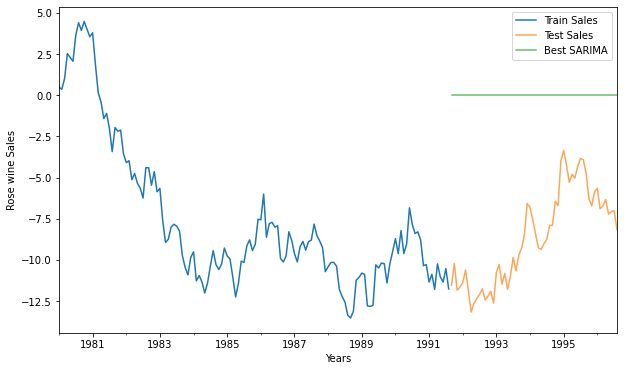

In [244]:
axis = train['Rose'].plot(label='Train Sales', figsize=(10, 6))
testCopy['Rose'].plot(ax=axis, label='Test Sales', alpha=0.7)
testCopy['sales_ts_forecasted'].plot(ax=axis, label='Best SARIMA', alpha=0.7)
axis.set_xlabel('Years')
axis.set_ylabel('Rose wine Sales')
plt.legend(loc='best')
plt.show()
plt.close()

In [245]:
resultsDf10 = pd.DataFrame({'RMSE': rmse}
                           ,index=['Best SARIMA Model : '])

a = pd.concat([resultsDf,resultsDf1,resultsDf2, resultsDf3, resultsDf4, resultsDf5, resultsDf6, resultsDf7, resultsDf8, resultsDf9, resultsDf10])

final_results_df = a.round(2)

print(final_results_df)

                                                     RMSE
Linear Regression Model                             17.24
Simple Average Model :                               7.87
Moving Average Model :                               0.20
Single Exponential Smoothening Model :              17.37
Double Exponential Smoothening Model                 7.09
Triple Exponential Smoothening Model Additive:       7.25
Triple Exponential Smoothening Model Multiplica...   7.25
Best AR Model :                                     10.46
Best ARMA Model:                                    10.00
Best ARIMA Model :                                   9.06
Best SARIMA Model :                                  9.05


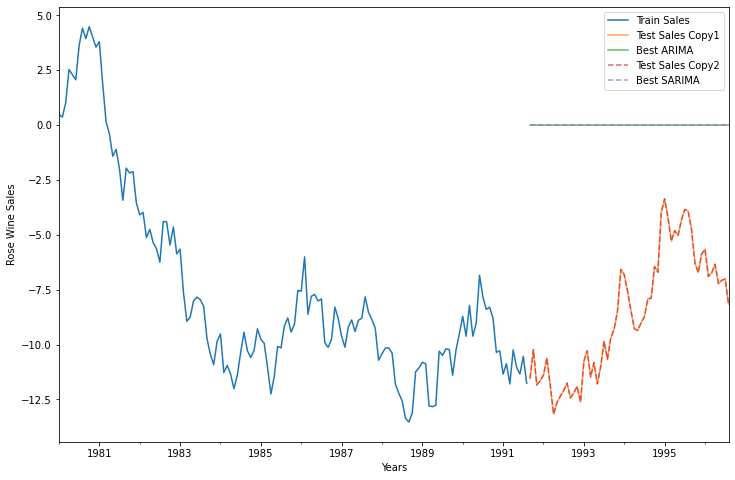

In [246]:
import matplotlib.pyplot as plt

# Combined Plot
axis = train['Rose'].plot(label='Train Sales', figsize=(12, 8))

# Plot data from testCopy1
testCopy1['Rose'].plot(ax=axis, label='Test Sales Copy1', alpha=0.7)
testCopy1['sales_ts_forecasted'].plot(ax=axis, label='Best ARIMA', alpha=0.7)

# Plot data from testCopy
testCopy['Rose'].plot(ax=axis, label='Test Sales Copy2', alpha=0.7, linestyle='--')
testCopy['sales_ts_forecasted'].plot(ax=axis, label='Best SARIMA', alpha=0.7, linestyle='--')

# Set labels and legend
axis.set_xlabel('Years')
axis.set_ylabel('Rose Wine Sales')
plt.legend(loc='best')

# Show plot
plt.show()
plt.close()


In [247]:
#Forecast sales using the best fit SARIMA model as per RMSE 
# Get forecast 36 steps (3 years) ahead in future
n_steps = 12
pred_uc_99 = best_results.get_forecast(steps=12, alpha=0.01) # alpha=0.01 signifies 99% confidence interval
pred_uc_95 = best_results.get_forecast(steps=12, alpha=0.05) # alpha=0.05 95% CI

# Get confidence intervals 95% & 99% of the forecasts
pred_ci_99 = pred_uc_99.conf_int()
pred_ci_95 = pred_uc_95.conf_int()

In [256]:
n_steps = 12
idx = pd.date_range(start='1995-08-01',end='1996-07-01',freq='MS')
fc_95 = pd.DataFrame(np.column_stack([np.power(10, pred_uc_95.predicted_mean), np.power(10, pred_ci_95)]), 
                     index=idx, columns=['forecast', 'lower_ci_95', 'upper_ci_95'])
fc_99 = pd.DataFrame(np.column_stack([np.power(10, pred_ci_99)]), 
                     index=idx, columns=['lower_ci_99', 'upper_ci_99'])
fc_all = fc_95.combine_first(fc_99)
fc_all = fc_all[['forecast', 'lower_ci_95', 'upper_ci_95', 'lower_ci_99', 'upper_ci_99']] # just reordering columns
fc_all.head()

,forecast,lower_ci_95,upper_ci_95,lower_ci_99,upper_ci_99
1995-08-01,3.418903e-13,5.668254e-203,2.062169e+177,5.668254e-203,2.062169e+177
1995-09-01,3.889938e-13,4.592725e-205,3.294693e+179,4.592725e-205,3.294693e+179
1995-10-01,3.487612e-13,3.097304e-207,3.927105e+181,3.097304e-207,3.927105e+181
1995-11-01,3.083280e-13,2.171638e-209,4.377624e+183,2.171638e-209,4.377624e+183
1995-12-01,3.293341e-13,1.936378e-211,5.601230e+185,1.936378e-211,5.601230e+185


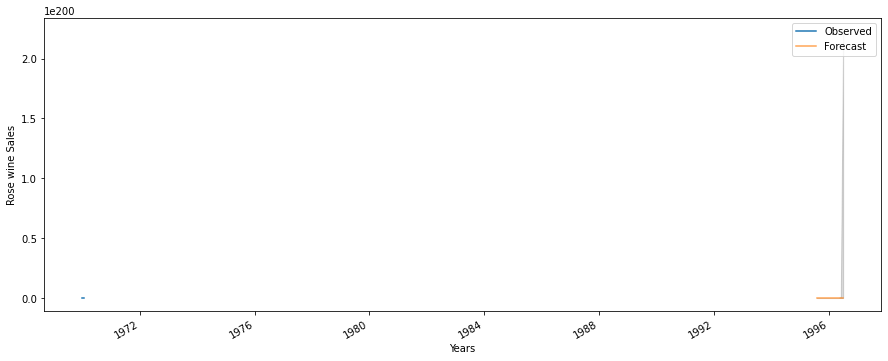

In [258]:
# plot the forecast along with the confidence band

axis = df.plot(label='Observed', figsize=(15, 6))
fc_all['forecast'].plot(ax=axis, label='Forecast', alpha=0.7)
axis.fill_between(fc_all.index, fc_all['lower_ci_95'], fc_all['upper_ci_95'], color='k', alpha=.15)
axis.set_xlabel('Years')
axis.set_ylabel('Rose wine Sales')
plt.legend(loc='best')
plt.show()